In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge , Lasso , BayesianRidge
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [ ]:
file_path = '/content/drive/MyDrive/honey_purity_dataset1.csv'
df = pd.read_csv(file_path)
df_unique = df.drop_duplicates(subset=["Purity"])
x = df_unique.drop(columns=['Purity'])
y= df_unique['Purity']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

LINEAR REGRESSION

In [ ]:
l_model = LinearRegression()
l_model.fit(x_train_scaled,y_train)
y_pred = l_model.predict(x_test_scaled)

In [ ]:
print("Linear Regression Results:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Linear Regression Results:
MSE: 0.045404501227411666
R^2 Score: -1.3998150754445913


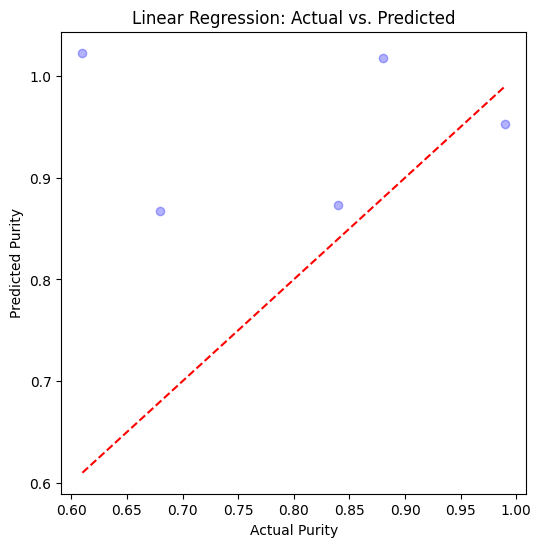

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Purity")
plt.ylabel("Predicted Purity")
plt.title("Linear Regression: Actual vs. Predicted")
plt.show()

POLYNOMIAL REGRESSION

In [ ]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [ ]:
p_model = LinearRegression()
p_model.fit(x_train_poly, y_train)
y_pred_poly = p_model.predict(x_test_poly)

In [ ]:
print("Polynomial Regression Results:")
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("R² Score:", r2_score(y_test, y_pred_poly))

Polynomial Regression Results:
MSE: 0.1427933105121784
R² Score: -6.54721514334981


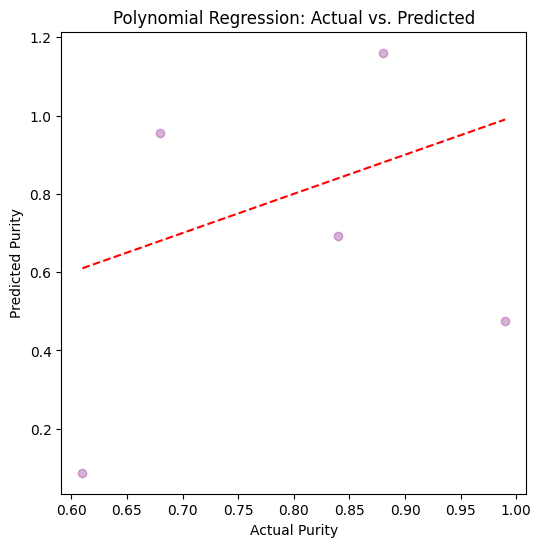

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_poly, color='purple', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Purity")
plt.ylabel("Predicted Purity")
plt.title("Polynomial Regression: Actual vs. Predicted")
plt.show()

RIDGE REGRESSION

In [ ]:
r_model = Ridge(alpha=1.0)
r_model.fit(x_train_scaled, y_train)
y_pred_r = r_model.predict(x_test_scaled)

In [ ]:
print("Ridge Regression Results:")
print("MSE:", mean_squared_error(y_test, y_pred_r))
print("R² Score:", r2_score(y_test, y_pred_r))

Ridge Regression Results:
MSE: 0.04214167972664474
R² Score: -1.2273615077507793


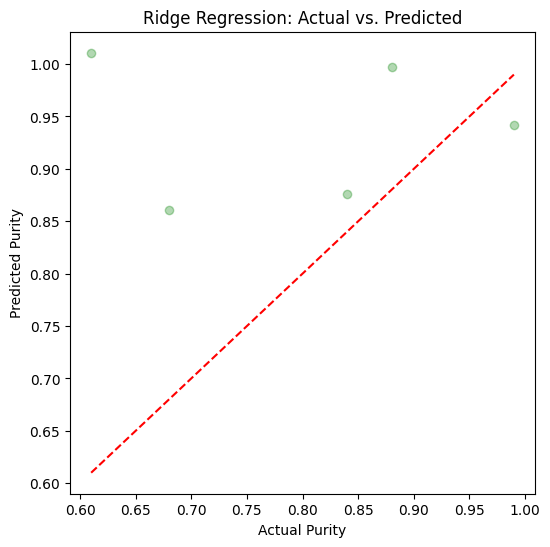

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_r, color='green', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Purity")
plt.ylabel("Predicted Purity")
plt.title("Ridge Regression: Actual vs. Predicted")
plt.show()

LASSO REGRESSION

In [ ]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(x_train_scaled, y_train)
y_predict_l=lasso_model.predict(x_test_scaled)

In [ ]:
print("Lasso Regression Results:")
print("MSE:", mean_squared_error(y_test, y_predict_l))
print("R² Score:", r2_score(y_test, y_predict_l))

Lasso Regression Results:
MSE: 0.021690083102493072
R² Score: -0.14641031197109267


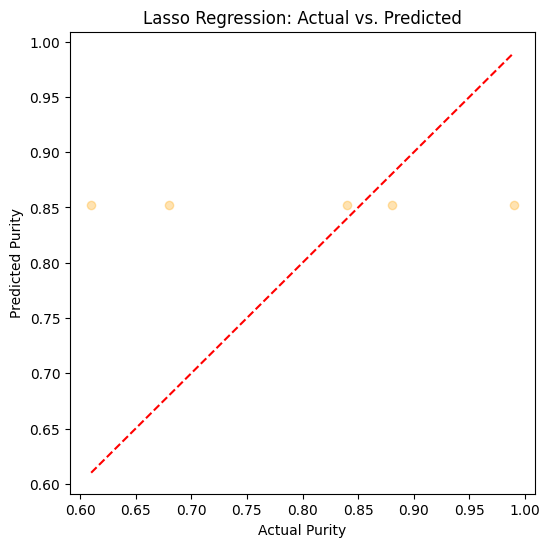

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_predict_l, color='orange', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Purity")
plt.ylabel("Predicted Purity")
plt.title("Lasso Regression: Actual vs. Predicted")
plt.show()

BAYESIAN REGRESSION

In [ ]:
b_model = BayesianRidge()
b_model.fit(x_train_scaled, y_train)
y_pred_b = b_model.predict(x_test_scaled)

In [ ]:
print("Bayesian Ridge Regression Results:")
print("MSE:", mean_squared_error(y_test, y_pred_b))
print("R² Score:", r2_score(y_test, y_pred_b))

Bayesian Ridge Regression Results:
MSE: 0.022268616471582355
R² Score: -0.17698818560160445


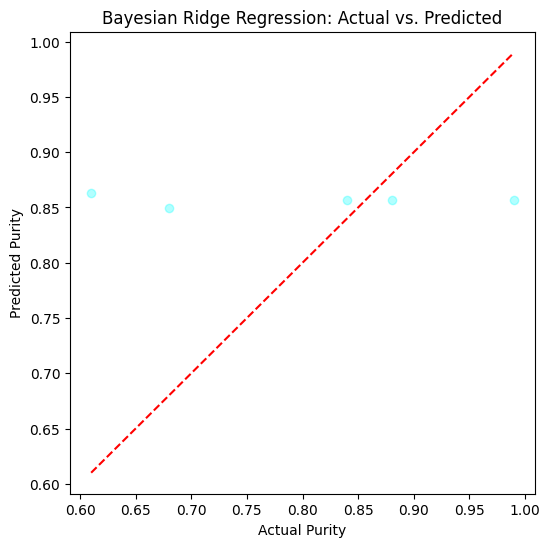

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_b, color='cyan', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Purity")
plt.ylabel("Predicted Purity")
plt.title("Bayesian Ridge Regression: Actual vs. Predicted")
plt.show()

RANDOM FOREST REGRESSION

In [ ]:
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

In [ ]:
print("Random forest Regression Results:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))

Random forest Regression Results:
MSE: 0.02262219199999995
R² Score: -0.19567610993657247


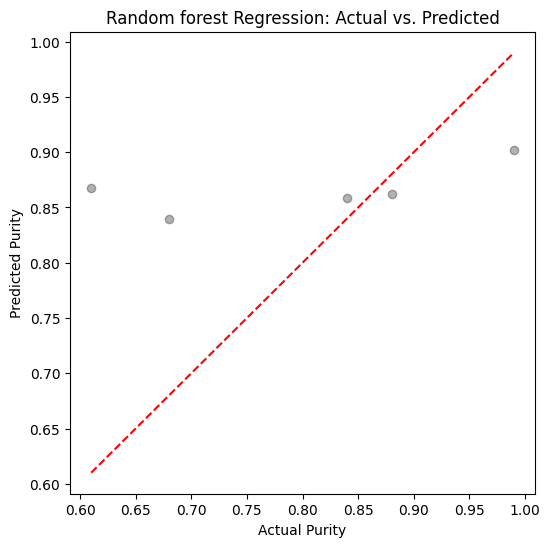

In [ ]:
plt.figure(figsize=(6, 6))
jitter = np.random.normal(0, 0.02, y_pred_rf.shape)
plt.scatter(y_test, y_pred_rf + jitter, color='black', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Purity")
plt.ylabel("Predicted Purity")
plt.title("Random forest Regression: Actual vs. Predicted")
plt.show()